In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [16]:
df_original = pd.read_csv('../data/zoo.csv', encoding='latin1')
df = df_original.copy()

df.head()

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mamifero
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pez
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero


In [17]:
df.describe(include='all')

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
count,101,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101
unique,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,rana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mamifero
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41
mean,NaN,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,NaN
std,NaN,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,NaN
75%,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,NaN


In [18]:
counts = df['Clase'].value_counts().sort_values(ascending=False)
counts

Clase
Mamifero        41
Ave             20
Pez             13
Invertebrado    10
Insecto          8
Reptil           5
Anfibio          4
Name: count, dtype: int64

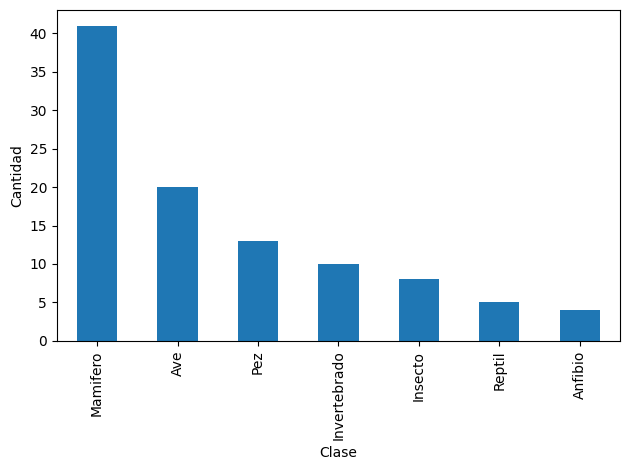

In [19]:
plt.figure()
counts.plot(kind='bar')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

### Que problemas puede tener esto?
- Desbalance de clases: si una clase tiene muchos mas ejemplos, el perceptron puede sesgarse a esa clase. Mitigacion: usar class_weight='balanced' o re-muestrar(oversampling/undersampling)
- Metricas enganosas con accuracy cuando hay desbalance. El modelo puede acertar mucho diciendo siempre Mamifero y fallar en reptil/anfibio.
- Clases con 4-5 ejemplos suelen nunca ser predichas(cero sensibilidad)
- Perceptron sesgado: en cada clasificador, "clase vs resto" hay muchos negativos y pocos positivos -> Las actualizaciones por la clase minoritaria pesan poco y el hiperplano se corre hacia la mayoritaria.
- Alto variance en minorias.
- Splits rotos: si no estratificas, te podes quedar sin ejemplos de una minoria en train/test: 

In [20]:


from sklearn.preprocessing import MinMaxScaler


cols_to_standardize = ['Cant_Patas']
scaler = MinMaxScaler().fit(df[cols_to_standardize])
df[cols_to_standardize] = scaler.transform(df[cols_to_standardize])



In [21]:
tipo_animales = ['Mamifero', 'Ave', 'Reptil', 'Anfibio', 'Pez', 'Invertebrado','Insecto'  ]
for tipo_animal in tipo_animales:
    print(f'===== Evaluando animal {tipo_animal} ===========')
    x = df.drop(columns=['animal', 'Clase'])
    y = (df['Clase'] == tipo_animal).astype(int)
    from perceptron import Perceptron


    ml = Perceptron(lr=0.05, max_iter=1000)
    ml.fit(x,y)
    print("Acuraccy del modelo:", ml.score(x,y))
   

    # Crear DataFrame con columnas y pesos
    weights_df = pd.DataFrame({
        'Variable': x.columns.tolist(),
        'Peso': ml.get_params()['w_']
    })

    # Agregar el bias como fila adicional
    bias_row = pd.DataFrame({'Variable': ['bias'], 'Peso': [ml.get_params()['b_']]})
    weights_df = pd.concat([weights_df, bias_row], ignore_index=True)

    # Ordenar por valor absoluto del peso (descendente) para ver las variables más importantes
    weights_df['Peso_Abs'] = abs(weights_df['Peso'])
    weights_df = weights_df.sort_values('Peso_Abs', ascending=False).drop('Peso_Abs', axis=1)

    print("Variables y sus pesos asignados:")
    print(weights_df)



===== Evaluando animal Mamifero ===========
Acuraccy del modelo: 1.0
Variables y sus pesos asignados:
         Variable      Peso
3      Toma_Leche  0.201011
2   Nace_de_huevo -0.168263
0      Tiene_Pelo  0.143398
10       Venenoso -0.059996
9         Respira  0.053840
15    Tamano_Gato  0.053183
16           bias -0.050000
13     Tiene_Cola -0.049635
5        Acuatico -0.049413
6      Depredador -0.041274
12     Cant_Patas -0.036348
1    Tiene_Plumas -0.035870
8      Vertebrado -0.018889
11   Tiene_Aletas -0.018465
7         Dentado  0.015478
4           Vuela -0.014881
14      Domestico  0.000193
===== Evaluando animal Ave ===========
Acuraccy del modelo: 1.0
Variables y sus pesos asignados:
         Variable      Peso
1    Tiene_Plumas  0.216171
7         Dentado -0.136628
11   Tiene_Aletas -0.100831
16           bias -0.100000
12     Cant_Patas -0.092218
6      Depredador -0.069592
13     Tiene_Cola  0.065434
10       Venenoso -0.062516
8      Vertebrado  0.059288
0      Tiene_Pelo

Probe varios entrenos y siempre el top 3 se mantiene Toma_Leche, Nace_de_huevo y Tamano_Gato.
